<a href="https://colab.research.google.com/github/ali-yildirim/SQL-on-MS-SQL-Server/blob/main/Credit%20Card%20Fraud%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [11]:
data = pd.read_csv("/content/creditcard.csv", on_bad_lines='skip')

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [14]:
print(data.shape)

(286805, 31)


In [15]:
print(data.describe())

                Time             V1             V2             V3  \
count  286805.000000  286805.000000  286805.000000  286805.000000   
mean    94186.361514      -0.000915       0.001668       0.005969   
std     47911.877330       1.955742       1.649039       1.515554   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     53544.000000      -0.920825      -0.597349      -0.884915   
50%     84291.000000       0.017070       0.066696       0.185512   
75%    139114.000000       1.314215       0.804992       1.032364   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  286805.000000  286805.000000  286805.000000  286805.000000   
mean        0.001979       0.000429       0.003325      -0.001659   
std         1.416467       1.378722       1.333877       1.235459   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.847785      -0.6915

In [16]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
print("Number of Fraudulent Interactions: " + str(len(fraud)) + "\nNumber of Valid Interactions: " + str(len(valid)))

Number of Fraudulent Interactions: 493
Number of Valid Interactions: 286310


In [33]:
x = data.drop(["Class"], axis = 1)
x = x.dropna()
y = data["Class"]
y = y.dropna()
x


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286800,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
286801,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
286802,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
286803,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [34]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
286800    0.0
286801    0.0
286802    0.0
286803    0.0
286804    0.0
Name: Class, Length: 286803, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,  random_state = 42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
yhat = rfc.predict(x_test)

In [39]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

acc = accuracy_score(y_test, yhat)
prec = precision_score(y_test, yhat)
rec = recall_score(y_test, yhat)
f1 = f1_score(y_test, yhat)
MCC = matthews_corrcoef(y_test, yhat)

print("The accuracy is {}".format(acc))
print("The precision is {}".format(prec))
print("The recall is {}".format(rec))
print("The F1-Score is {}".format(f1))
print("The Matthews correlation coefficient is {}".format(MCC))

The accuracy is 0.9996513310437405
The precision is 0.9666666666666667
The recall is 0.8365384615384616
The F1-Score is 0.8969072164948454
The Matthews correlation coefficient is 0.8990855907687529


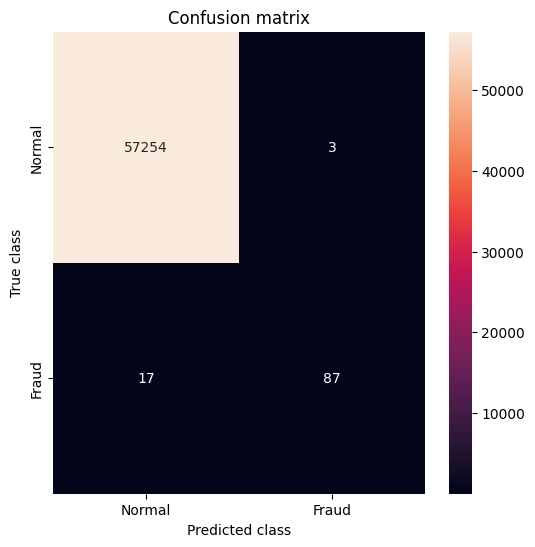

In [42]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yhat)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()